# Lecture 4: Hypothesis Testing via Permutation

## Today's Learning Goals

By the end of this lecture, you should be able to:

1. Give an example of a question you could answer with a hypothesis test.
2. Given an inferential question, formulate hypotheses to be used in a hypothesis test.
3. Identify the correct steps and components of a basic hypothesis test.
4. Write computer scripts to perform hypothesis testing via randomization (e.g., permutation) and interpret the output.
5. Identify the advantages of randomization tests when estimating parameters different from proportions and means.
6. Describe the relationship between confidence intervals and hypothesis testing.

## 1. A Data Science question we can answer with hypothesis testing

You might be surprised, but hypothesis tests are necessary for many important Data Science-related inquiries (mostly inferential or causal, and sometimes even predictive!). 

Let us check the following inquiry:

*Will changing the design of the website lead to a change in customer engagement (measured by the **click-through-rates**, CTRs, for example)?*

```{figure} img/A-B-testing.png
---
:height: 400px
:name: AB_testing
---
*Source: [A/B testing - Optimizely.](https://www.optimizely.com/optimization-glossary/ab-testing/).*
```

This inquiry is related to a tool we call **A/B testing**, and it involves experimentation. We compare **two experimental treatments** in terms of their corresponding CTRs (proportions between 0 and 1) through hypothesis testing. Moreover, this approach can be expanded to **three or more treatments** leading to **A/B/n testing**.

Hypotheses in A/B (*or A/B/n*) testing can involve variables of different types (real-valued, counts, proportions, etc.). Moreover, we would also get into multiple peeking or early stopping. We will see different statistical approaches to deal with these matters in DSCI 562 and 554.

## 2. The Hypothesis Testing Fundamentals

We use data from a random sample to help us decide between two competing hypotheses about a population parameter, or maybe a set of them. 

We make these hypotheses more concrete by specifying them with at least one population parameter of interest. These parameters of interest are usually represented by greek letters denoting these population parameters!

These hypotheses have specific names:

1. **Null hypothesis ($H_0$):** *The status quo*.
2. **Alternative hypothesis ($H_A$):** *Our hypothesis of interest*.

```{attention} 
It is **NOT** correct (statistically speaking) to include variables denoting **sample statistics** (e.g, $\bar{x}$ or $S^2$) or **estimators** of population parameters (e.g., $\hat{\mu}$) in **ANY** of the hypotheses.
```

**Null Hypothesis ($H_0$)**

It is *usually* a claim that there really is “no effect” or “no difference”. In many cases, the null hypothesis represents the **status quo** or nothing interesting.

**Alternative Hypothesis ($H_A$)**

It is the claim for which **we seek significant statistical evidence**. Furthermore, it is usually what the experimenter or researcher wants to establish or find evidence.

### 2.1. Hypotheses in A/B Testing

Let us revisit the A/B testing question: *will changing the design of the website lead to a change in customer engagement (measured by the CTRs)?*

**What is the set of hypotheses in plain words?**

**Null hypothesis, $H_0$:** The **population CTRs** for the two versions of the website are equal.

**Alternative hypothesis, $H_A$:** The **population CTRs** for the two versions of the website are **NOT** equal.

### 2.2. Another Example

Let us suppose that we have an inferential inquiry regarding Metro Vancouver during summertime: *is the gestation length of firstborn babies in Metro Vancouver different from that of non-firstborn babies during summertime?*

**What is the set of hypotheses in plain words?**

$H_0$: **Population mean** pregnancy **lengths** for firstborn babies and non-firstborn babies are equal **in Metro Vancouver during summertime**.

$H_A$: **Population mean** pregnancy **lengths** for firstborn babies and non-firstborn babies are **NOT** equal **in Metro Vancouver during summertime**.

```{important}
Statistical hypotheses need to be as precise and concise as possible. Therefore, our population of interest has to be clearly specified along with the respective parameter(s). This definition also helps us in setting up our sampling scheme and data collection!
```

## 3. The Hypothesis Testing Framework

Our testing procedure is developed **under a null framework**, i.e., the one corresponding to $H_0$. For the A/B testing example, we initially assume that the population CTRs for the two versions of the websites are equal.

Provided a **strong enough statistical evidence** via our random sample drawn from the population of interest, **we can reject $H_0$ in favour of $H_A$**. Again, for the A/B testing example, we would have enough statistical evidence to state the population CTRs for the two versions of the websites are not equal.

If the random sample does not provide such strong statistical evidence, **we fail to reject $H_0$**.

### 3.1. How do assess the sample's statistical evidence?

- Create a model of what we would expect under the null hypothesis, $H_0$.
- Define a test statistic that corresponds to our model of $H_0$.

### 3.2. Back to the A/B Testing Example

```{figure} img/A-B-testing.png
---
:height: 400px
:name: AB_testing-2
---
*Source: [A/B testing - Optimizely.](https://www.optimizely.com/optimization-glossary/ab-testing/).*
```

#### 3.2.1. How do we compute a CTR?

We define the CTR as the following ratio:

$$\text{CTR}_i = \frac{\text{Total number of clicks on the button of interest in the $i$th page}}{\text{Total number of impressions on the $i$th page}}.$$

Let us define some notation (it is always important!):

- $p_\text{control} \in [0,1]$ is the CTR of the control treament. 
- $p_\text{variation} \in [0,1]$ is the CTR of the variation treament. 

```{attention} 
For the $i$th treatment, we can also use greek letters here instead of $p_i$ (e.g., $\pi_i$). The use of $p_i$ is an alternative statistical notation for proportions/probabilities.
```

Now, we can mathematically define the set of hypotheses:

$$H_0: p_\text{control} = p_\text{variation},$$

or

$$H_0: \underbrace{p_\text{control} - p_\text{variation}}_{\delta} = 0,$$

or 

$$H_0:\delta = 0;$$

versus

$$H_A: p_\text{control} \neq p_\text{variation},$$

or

$$H_A: \underbrace{p_\text{control} - p_\text{variation}}_{\delta} \neq 0,$$

or 

$$H_A:\delta \neq 0.$$

Our next goal is to figure out a **simulated random permutation process** (to be explained in a further section) under the null hypothesis.

Then, we can see where our **observed** test statistic 

$$\hat{\delta} = \hat{p}_\text{control} - \hat{p}_\text{variation}$$ 

falls on the simulated distribution. Depending on where it falls, we will have evidence to reject $H_0$ or not.

```{attention} 
The estimate $\hat{\delta}$ is the difference of the observed CTRs $\hat{p}_\text{control}$ and $\hat{p}_\text{variation}$ coming from our **experiment's original sample**.
```

#### 3.2.2. How would our experimental data look like?

Suppose we have a sample size $n = 10$ and a **balanced experiment** (i.e., we have the same amount of subjects in the control and variation websites).

| Visit | website | Click (yes/no) |
|-------|---------|-------------|
| 1 | control | no |
| 2 | control | yes |
| 3 | control | yes |
| 4 | control | yes |
| 5 | control | yes |
| 1 | variation | no |
| 2 | variation | no |
| 3 | variation | no |
| 4 | variation | yes |
| 5 | variation | no |

This is one way we could simulate the null hypothesis $H_0$ being true:

```{figure} img/generate.jpeg
:height: 400px
:name: generate_dist
```

#### 3.2.3. What are we assuming by randomly shuffling the labels?

Since we are working under a null framework, *we assume that **ANY** observed difference between both treatments will only happen due to chance*. Therefore, any permuted relabeling **WOULD BE** as similar as **our real observed $\hat{\delta}$**.

```{attention}
This method is called permutation (sampling **WITHOUT** replacement).
```

How can we statistically confirm this? First, let us shuffle the labels $r$ times to generate a null distribution of test statistics ($\delta$) for $H_0$. It would look something like this:

```{figure} https://d33wubrfki0l68.cloudfront.net/7586f37ecac234639f7fb8066632f510b1089e69/07b55/ismaykim_files/figure-html/unnamed-chunk-382-1.png
:height: 400px
:name: null_dist

*Example of a null distribution.*
```

Then, we could ask: *where does our sample test statistic $\hat{\delta}$ fall in that distribution?*

If **an observed test statistic** falls to either one of the extreme ends of the distribution past some threshold (it is specified using a significance level $\alpha $), we would think this was unlikely to happen simply due to chance **under the null framework**. Thus, we can reject $H_0$. **Note this "either one of the extreme ends" rule only applies to a two-sided test (equal versus not equal in set of the hypotheses).**

```{figure} img/H0_dist_low_delta.png
:height: 400px
:name: null_dist_reject

*Example of a null distribution when rejecting $H_0$.*
```

On the other hand, if **an observed test statistic** falls near the middle of this distribution, then we do not have enough statistical evidence to reject $H_0$.


```{figure} img/H0_dist_high_delta.png
:height: 400px
:name: null_dist_not_reject

*Example of a null distribution when failing to reject $H_0$.*
```

```{attention}
Even though we cannot reject $H_0$, we do not accept it. **We simply fail to reject it.**
```

### 3.3. Recap: Six Steps of Hypothesis Testing

1. Define your null and alternative hypotheses.
2. Compute the **observed** test statistic $\hat{\delta}$ coming from your original sample.
3. Use the null model to generate $r$ **random permuted** samples from the original sample and calculate their corresponding $r$ test statistics.
4. Generate the null distribution using these $r$ test statistics.
5. Check where your **observed** test statistic $\hat{\delta}$ falls on this distribution.
6. If $\hat{\delta}$ is near the extremes past some threshold defined with a significance level $\alpha$ (i.e., $p$-value is less than $\alpha$), we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.

**Let us check the `infer` workflow!**

```{figure} https://d33wubrfki0l68.cloudfront.net/391315f52b3be002b49628738e22cfd6dae7cae1/cff0f/images/flowcharts/infer/ht.png
:height: 400px
:name: infer_workflow_perm_test

Image from [*Ismay and Kim (2021)*](https://moderndive.com/9-hypothesis-testing.html#infer-workflow-ht).
```

## 4. Carryout a Hypothesis Test on Real Data

Let us apply what we have seen so far. We will work with part of the data from ["Improving Library User Experience with A/B Testing: Principles and Process"](https://quod.lib.umich.edu/w/weave/12535642.0001.101?view=text;rgn=main) by Young (2014). This paper presents a case study where A/B testing is applied with different webpage designs. The primary aim is to compare user interactions to determine which one statistically improves the navigation experience by increasing the homepage CTR. The experiment was conducted using the web analytics software Google Analytics and [Crazy Egg](https://www.crazyegg.com/). The setup was done in the Montana State University's library webpage.

The experimental treatments are the following: *Interact* (the **control** treatment), *Connect*, *Learn*, *Help*, and *Services*. **Nonetheless, for the sake of this exercise, we will only work with *Interact* and *Services*.**

```{important}
It is possible to work with as many treatments as we wish. However, this implies multiple testing corrections, as we will further see in DSCI 554.
```

### 4.1. Why running an A/B testing?

According to the click heatmap, there was a low user engagement in the *Interact* section (i.e., the control treatment).

```{figure} https://quod.lib.umich.edu/w/weave/images/12535642.0001.101-00000002.png
:height: 400px
:name: ab_webpage

*Image from <a href="https://quod.lib.umich.edu/w/weave/12535642.0001.101?view=text;rgn=main">Young (2014).*
```

### 4.2. What is the difference between both treatments?

To increase engagement, the experimenter changed the title of the section.

```{figure} img/ab_test2.png
:height: 400px
:name: ab_webpage_2

*Image from <a href="https://quod.lib.umich.edu/w/weave/12535642.0001.101?view=text;rgn=main">Young (2014).*
```

### 4.3. What is the metric in this case?

It is the homepage CTR for the $i$th treatment:

$$p_i = \frac{\text{Total number of clicks on the target button in the $i$th treatment}}{\text{Total number of clicks on the $i$th homepage's treatment}}$$

### 4.4. Loading `R` Packages

Let us load the libraries for data wrangling, analysis, and plotting.

In [1]:
library(tidyverse)
library(infer)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 4.5. Loading the Experimental Data Set

The data `click_through` contains two columns where each row represents a visitor *who is randomized to either one of the experimental treatments*: `Interact` or `Services` in column `webpage`. The column `click_target` indicates whether the visitor clicked on the button of interest (`1`) or not (`0`). Note we have a binary type variable here.

```{attention}
Treatment randomization is extremely important in traditional A/B testing.
```

In [2]:
click_through <- read_csv("data/click_through.csv")
click_through

Rows: 3722 Columns: 2
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): webpage
dbl (1): click_target

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


webpage,click_target
<chr>,<dbl>
Services,0
Interact,0
Services,0
⋮,⋮
Interact,0
Services,0
Services,0


### 4.6. Getting $\hat{p}_I$ and $\hat{p}_S$

We obtain the CTR for the *Interact* (control) treatment $\hat{p}_I$ and for the *Services* treatment $\hat{p}_S$ from our sample (note the hat notation). We can see this is an **unbalanced experiment** (unequal numbers of visitors in `treatment_size`)

In [3]:
click_through_est <- click_through |>
  group_by(webpage) |>
  summarize(click_rate = sum(click_target) / n(), treatment_size = n())
click_through_est

webpage,click_rate,treatment_size
<chr>,<dbl>,<int>
Interact,0.02847709,2423
Services,0.04849885,1299


### 4.7. Some quick data wrangling

We convert `click_target` and `webpage` to factor-type.

In [4]:
click_through <- click_through |>
  mutate(
    click_target = factor(click_target), webpage = factor(webpage)
  )
click_through

webpage,click_target
<fct>,<fct>
Services,0
Interact,0
Services,0
⋮,⋮
Interact,0
Services,0
Services,0


### 4.8. Getting 95% bootstrap confidence interval for *Interact* with $b = 1,000$

In [5]:
set.seed(1234) # For reproducibility.
interact_ci <- click_through |>
  filter(webpage == "Interact") |>
  specify(response = click_target, success = "1") |>
  generate(reps = 1000, type = "bootstrap") |>
  calculate(stat = "prop") |>
  get_ci()
interact_ci$webpage <- "Interact"
interact_ci

lower_ci,upper_ci,webpage
<dbl>,<dbl>,<chr>
0.0222761,0.03467809,Interact


### 4.9. Getting 95% bootstrap confidence interval for *Services* with $b = 1,000$

In [6]:
set.seed(1234) # For reproducibility.
services_ci <- click_through |>
  filter(webpage == "Services") |>
  specify(response = click_target, success = "1") |>
  generate(reps = 1000, type = "bootstrap") |>
  calculate(stat = "prop") |>
  get_ci()
services_ci$webpage <- "Services"
services_ci

lower_ci,upper_ci,webpage
<dbl>,<dbl>,<chr>
0.03693226,0.06004619,Services


### 4.10. Hold on! Why are we getting confidence intervals by treatment?

It might seem unnecessary to obtain point estimates by treatment along with the corresponding confidence intervals. However, these computations are helpful if we plot them for one particular reason: *if the confidence intervals do not overlap, this **MIGHT** be a hint of an interesting and possible significant result in our hypothesis testing*.

```{important} 
In general, let us not rush to **inferential** conclusions when doing an exploratory analysis via plots and take all our graphical findings with a grain of salt.
```

### 4.11. Binding together both confidence intervals before plotting

In [7]:
cis <- bind_rows(interact_ci, services_ci)
cis

lower_ci,upper_ci,webpage
<dbl>,<dbl>,<chr>
0.02227610,0.03467809,Interact
0.03693226,0.06004619,Services


### 4.12. Joining point estimates, treatment sizes, and confidence intervals

In [8]:
click_through_est <- left_join(click_through_est, cis)
colnames(click_through_est) <- c("webpage", "click_rate", "treatment_size", "lower_ci", "upper_ci")
click_through_est

Joining with `by = join_by(webpage)`


webpage,click_rate,treatment_size,lower_ci,upper_ci
<chr>,<dbl>,<int>,<dbl>,<dbl>
Interact,0.02847709,2423,0.02227610,0.03467809
Services,0.04849885,1299,0.03693226,0.06004619


### 4.13. Plotting 95% bootstrap confidence intervals by treatment

In [13]:
options(repr.plot.width = 15, repr.plot.height = 10)

CTR_plot <- ggplot(click_through_est, aes(x = webpage, y = click_rate)) +
  geom_point(size = 4) +
  geom_errorbar(aes(ymin = lower_ci, ymax = upper_ci), width = 0.1) +
  xlab("Webpage Version") +
  ylab("Click-Through Rate") +
  theme(text = element_text(size = 20)) +
  ylim(c(0, 0.065)) +
  scale_y_continuous(breaks = seq(0, 0.065, by = 0.005)) +
  theme(
    text = element_text(size = 30),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    panel.grid = element_line(color = "#8ccde3", linewidth = 0.75, linetype = 2)
  )

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


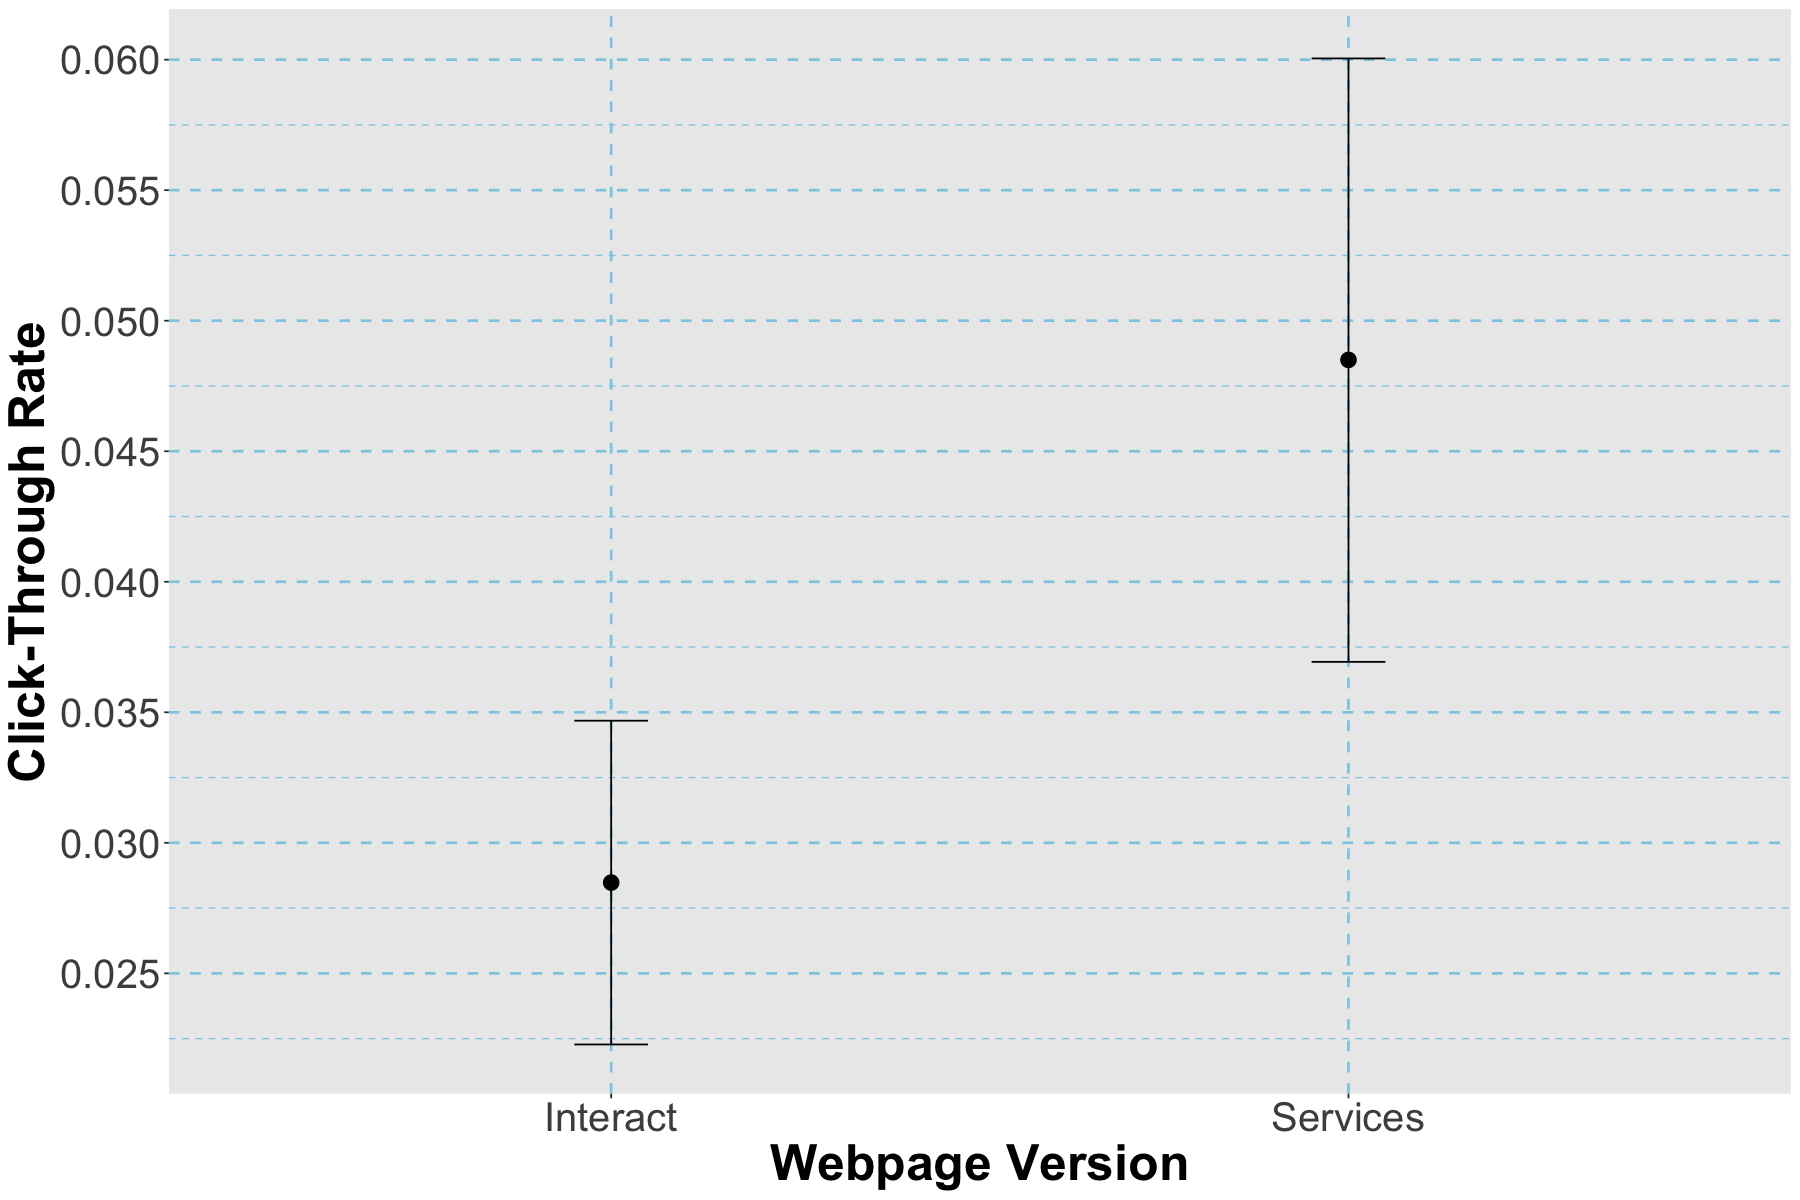

In [14]:
CTR_plot

**What is this plot telling us?**
 
There is indeed *graphical evidence* that both intervals do not overlap. Nonetheless, they are pretty close! We need to go statistically further!

### 4.14. Let us follow the six steps now!

#### 1. Define the null and alternative hypotheses.

Suppose **we want to infer if the *Services* version has a higher CTR than the *Interact* version**. This is a **one-sided test**:

$H_0$: The CTR for the *Interact* version of the website is the same as the CTR for the *Services* version of the website (i.e., $p_{I} = p_{S}$).

$H_A$: The CTR for the *Services* version of the website is higher than the CTR for the *Interact* version of the website (i.e., $p_{I} < p_{S}$).

Note that $\delta$ can be defined as follows:

$$
H_0: \underbrace{\delta}_{p_{S} - p_{I}} = 0
$$

$$
H_A: \underbrace{\delta}_{p_{S} - p_{I}} > 0
$$

Then, a reasonable test statistic is the difference of sample proportions: 

$$\hat{\delta} = \hat{p}_{S} - \hat{p}_{I}.$$

#### 2. Compute the **observed** test statistic $\hat{\delta}$ coming from your original sample.

In [13]:
click_through_est

delta_hat <- diff(click_through_est$click_rate)
round(delta_hat, 5)

webpage,click_rate,treatment_size,lower_ci,upper_ci
<chr>,<dbl>,<int>,<dbl>,<dbl>
Interact,0.02847709,2423,0.02227610,0.03467809
Services,0.04849885,1299,0.03693226,0.06004619


[1] 0.02002

#### 3. Use the null model to generate $r$ **random permuted** samples from the original sample and calculate their corresponding $r$ test statistics.

We use the `infer` package to now generate $r = 1000$ random permuted samples under $H_0$. For each simulated sample, we calculate a test statistic.

In [14]:
set.seed(1234) # For reproducibility.
null_distribution_webpage <- click_through |>
  specify(formula = click_target ~ webpage, success = "1") |>
  hypothesize(null = "independence") |>
  generate(reps = 1000, type = "permute") |>
  calculate(stat = "diff in props", order = c("Services", "Interact"))
null_distribution_webpage

replicate,stat
<int>,<dbl>
1,-0.001263869
2,-0.004811473
3,-0.007176542
⋮,⋮
998,-0.001263869
999,0.008196406
1000,0.007013872


#### 4. Generate the null distribution using these $r$ test statistics.

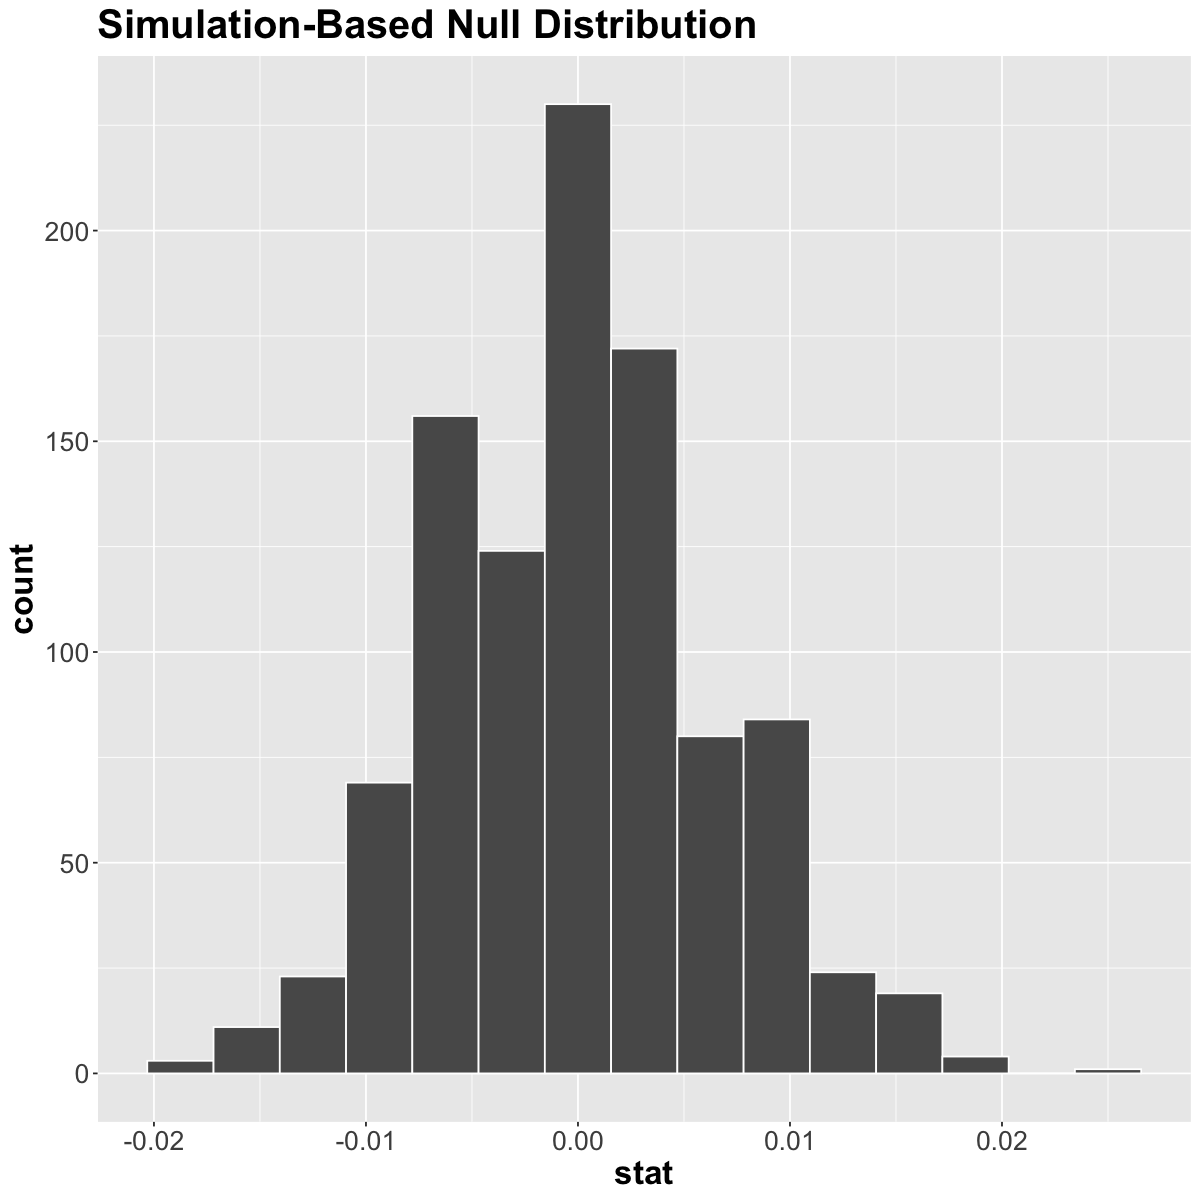

In [15]:
options(repr.plot.width = 10, repr.plot.height = 10) 
h0_dist <- null_distribution_webpage |> 
    visualize() +
    theme(text = element_text(size=20)) +
  theme(
    text = element_text(size = 20),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  )
h0_dist 

#### 5. Check where your **observed** test statistic $\hat{\delta}$ falls on this distribution.

Firstly, where is our threshold for rejecting $H_0$ on this distribution with a significance level $\alpha = 0.05$? **Recall this is a one-sided test**; thus, we will use `quantile()` to calculate the 0.95th quantile of this distribution.

In [16]:
alpha_threshold <- quantile(null_distribution_webpage$stat, 0.95)

h0_dist <- h0_dist + geom_vline(
  xintercept = alpha_threshold,
  color = "blue", lty = 5, linewidth = 2
)

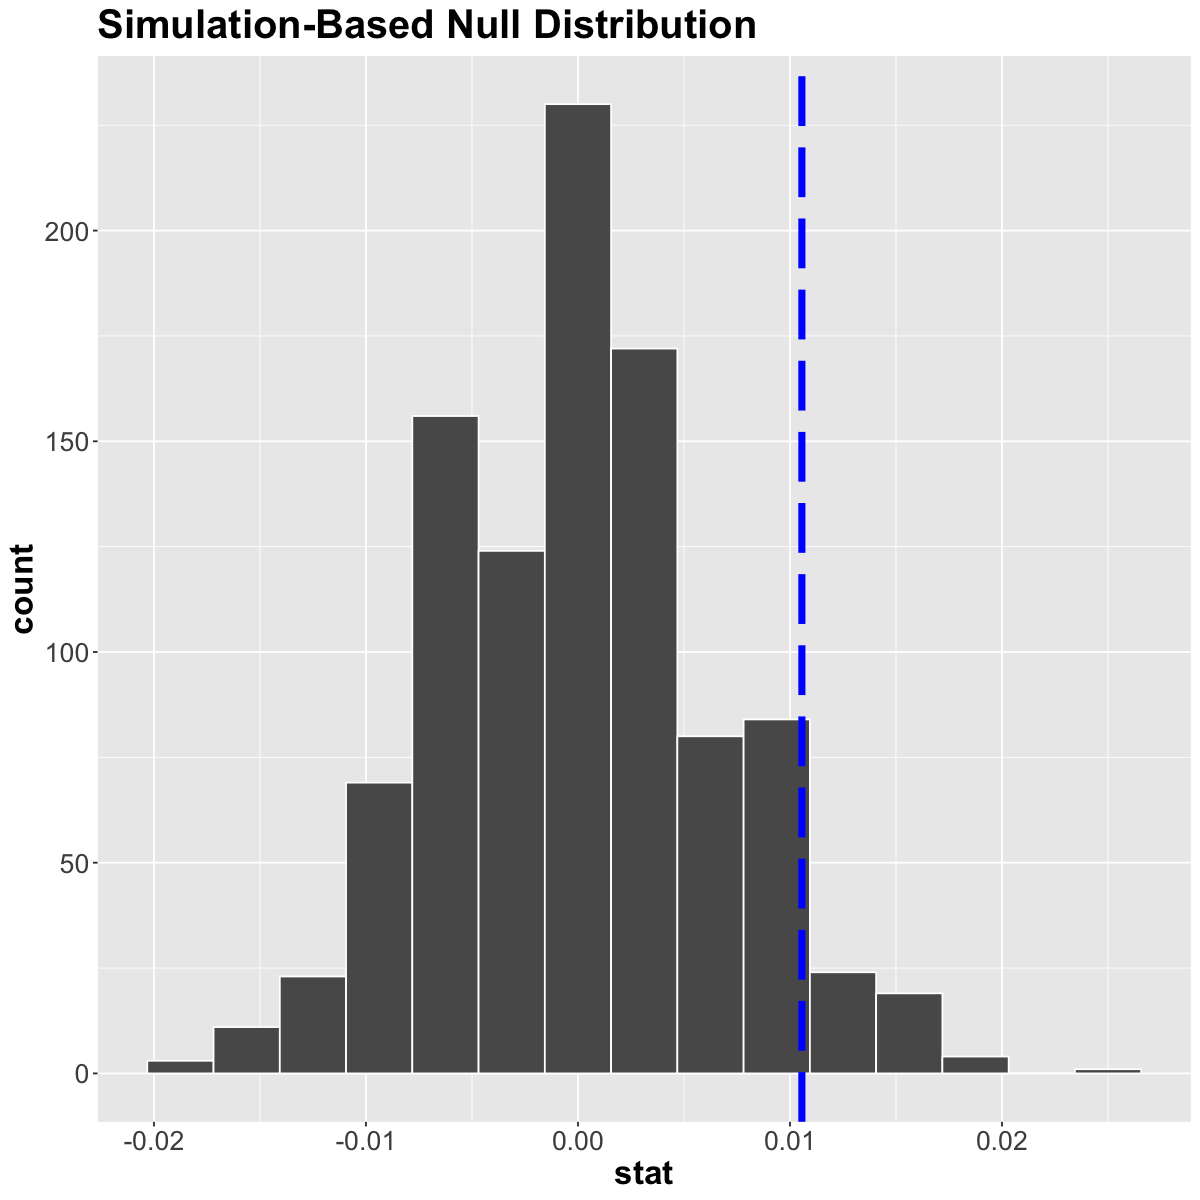

In [17]:
h0_dist

Where is our sample test statistic $\hat{\delta}$ on this distribution?

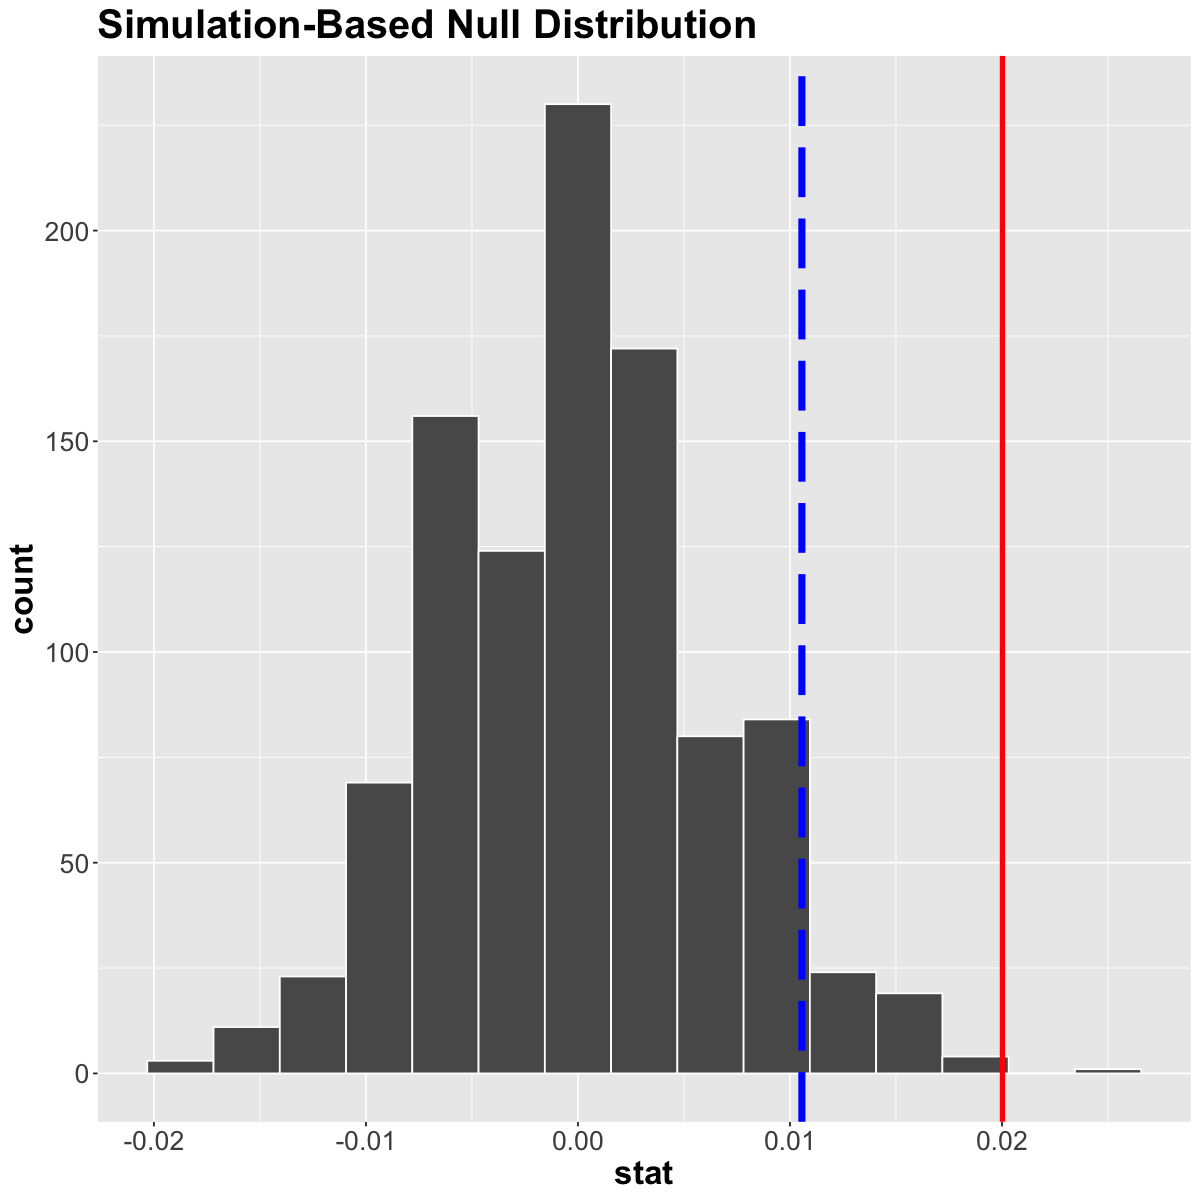

In [18]:
h0_dist <- h0_dist +
    geom_vline(xintercept = delta_hat, color = "red", linewidth = 1.5)
h0_dist

#### 6. If $\hat{\delta}$ is near the extreme past some threshold defined with a significance level $\alpha$, we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.

Since our **observed test statistic** is large enough to lie beyond the significance threshold, we reject $H_0$ in favour of $H_A$.

### 4.15. An Important Note

We typically do not create histograms with vertical lines in practice. However, we are doing that now to help us learn about hypothesis testing. Instead, in practice, we compute a $p$-value to determine whether our test statistic lies beyond the significance threshold.

#### What is a $p$-value?

#### Here is the definition: 

The $p$-value is the probability of obtaining a test statistic just as extreme or more extreme than the observed test statistic under our null model.

#### In a simulation, we can approximate this as:

In what percentage of the simulations was the difference in sample proportions at least as extreme as the observed difference proportion $\hat{\delta}$?

How do we calculate it with `infer`?

In [20]:
null_distribution_webpage |>
  get_pvalue(obs_stat = delta_hat, direction = "greater")

p_value
<dbl>
0.001


Calculating the $p$-value, instead of creating a visualization as we did above, leads us to the same conclusion:

*Given that our $p$-value is < 0.05 (our defined significance threshold $\alpha$), we can reject the null hypothesis $H_0$ (the CTRs for both website versions are the same) in favour of the alternative hypothesis $H_A$.*

We can also calculate the simulation's $p$-value "manually":

In [21]:
sum(null_distribution_webpage$stat >= delta_hat) / 1000 

[1] 0.001

## 5. Wrap-Up

What did we learn today? Let us make a list here!

- What a hypothesis test is and what questions it helps answer.
- What the steps are for performing a hypothesis test.
- How to interpret the results of a hypothesis test.

## 6. What is next?

- Another example of using `R` to perform hypothesis tests.
- Exploring the idea that there is only one hypothesis test.

## 7. Acknowledgements

- [Data Science in a box](https://github.com/rstudio-education/datascience-box) by Mine Cetinkaya-Rundel
- [Inference in 3 hours](https://github.com/AllenDowney/CompStats) by Allan Downey
- [Modern Dive: An Introduction to Statistical and Data Sciences via R](https://moderndive.com/index.html) by Chester Ismay and Albert Y. Kim